In [2]:
# import necessary packages

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from plotnine import *



1. Load the necessary libraries (pandas, plotnine)

2. Load the following dataset `Fifa = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/players_15.csv")`. For more info check out [this link.](https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset/version/1#)

3. How old is the average player in FIFA20? Use plotnine/ggplot to plot a histogram of their ages.

4. Do right footed players weigh more than right footed players? Use ggplot/plotnine to make a graph to answer this question.

5. Is there a difference in height between the clubs Chelsea and Manchester United? Use ggplot/plotnine to make a graph to answer this question.

6. Is there a difference in the relationship between height and weight for people born in each of the 12 months? Use ggplot/plotnine to make a graph to answer this question. (see code below on how to extract the month from the column `fifa[dob]`) 

7. Is there an averaged difference between players with different `body_type`s? Use ggplot/plotnine to make a graph to answer this question. Discuss what kind of plot would best communicate this information in your opinion.

8. Calculate a new column `bmi` for the fifa dataset. The formula for BMI is below. Note: Body Mass Index (BMI) is not a universal metric of health, and should NOT be taken as such. Use ggplot/plotnine to plot a histogram of the different BMIs in the dataset. Add a dashed line using `+ geom_vline(xintercept = mean, linetype = "dashed", size = 3)` where mean is the mean BMI for the whole dataset.

$$ BMI = \frac{weight(kg)}{height(m)^2}$$

9. What is the relationship between height and weight for each `body_type`? Use `facet_wrap()` to make a separate height/weight scatterplot for each body type.

10. Is there an association between jersey number and age?  Use ggplot/plotnine to make a graph to answer this question.

11. Let's use your CPSC230 skills, create a column in `fifa` called `name_len` that counts the number of characters in each player's `long_name` (spaces shouldn't count). Then use ggplot/plotnine to create a histogram of `name_len` and add `+theme_minimal()` to your graph. What is the typical range of name length?
 

In [5]:
### YOUR CODE HERE ###
fifa = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/players_15.csv")



# get month of date of birth
fifa["monthBorn"] = fifa["dob"].str.extract(r'-([0-9][0-9])-')
fifa.head()
# for i in fifa.columns:
#     print(i)

# list(fifa.columns)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,monthBorn
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,...,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,06
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,...,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,02
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,...,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,01
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,...,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,10
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03


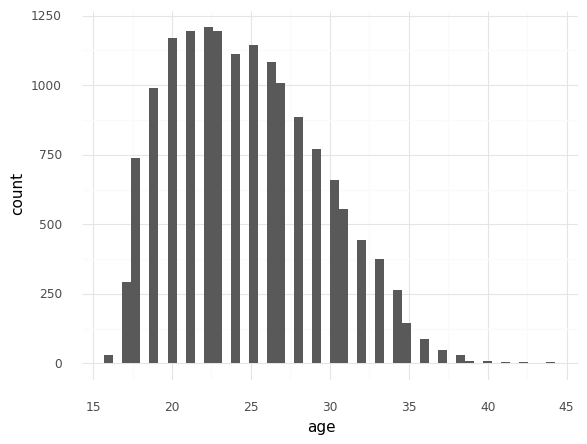

<ggplot: (8791329598257)>

In [8]:
#3 
meanAge = fifa["age"].mean()
(ggplot(fifa, aes( x  = "age", )) +
geom_histogram() +
theme_minimal())

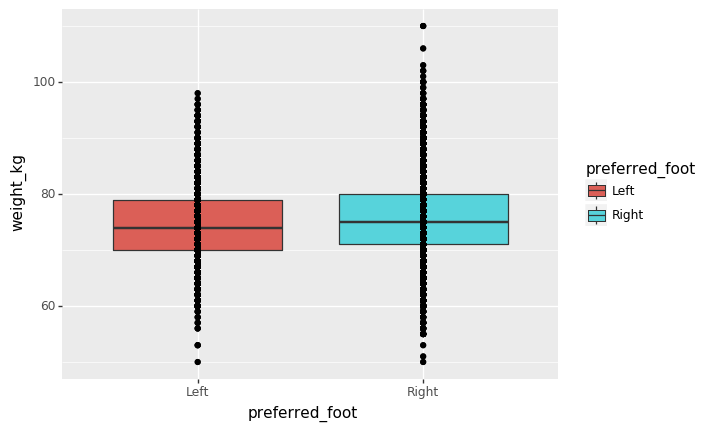

<ggplot: (8791330150817)>

In [16]:
#4
(ggplot(fifa, aes ( x = "preferred_foot", y = "weight_kg")) +
geom_boxplot(aes(fill = "preferred_foot")) +
geom_point())

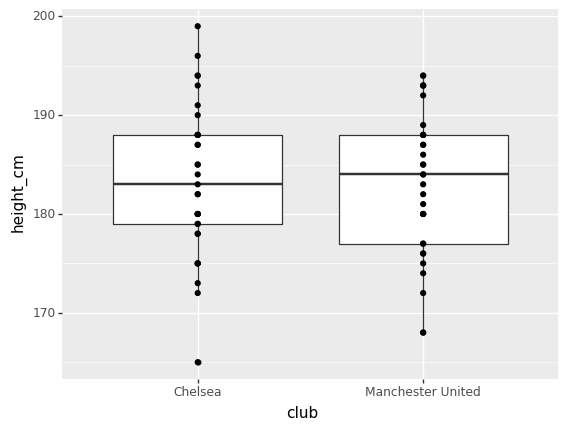

<ggplot: (8791329196597)>

In [29]:
#5
chelsMan = (fifa["club"] == "Chelsea") | (fifa["club"] == "Manchester United")
df5 = fifa.loc[chelsMan]
(ggplot(df5, aes ( x = "club", y = "height_cm")) +
geom_boxplot()+
geom_point())

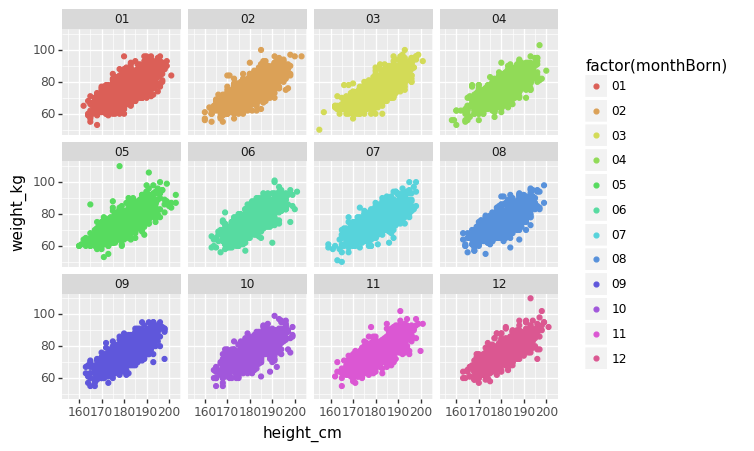

<ggplot: (8791316101577)>

In [30]:
#6
fifa["monthBorn"] = fifa["dob"].str.extract(r'-([0-9][0-9])-')
(ggplot(fifa, aes ( x = "height_cm", y = "weight_kg", color = 'factor(monthBorn)')) +
geom_point() +
facet_wrap("~monthBorn")) 


In [31]:
#7??


8. Calculate a new column `bmi` for the fifa dataset. The formula for BMI is below. Note: Body Mass Index (BMI) is not a universal metric of health, and should NOT be taken as such. Use ggplot/plotnine to plot a histogram of the different BMIs in the dataset. Add a dashed line using `+ geom_vline(xintercept = mean, linetype = "dashed", size = 3)` where mean is the mean BMI for the whole dataset.

$$ BMI = \frac{weight(kg)}{height(m)^2}$$


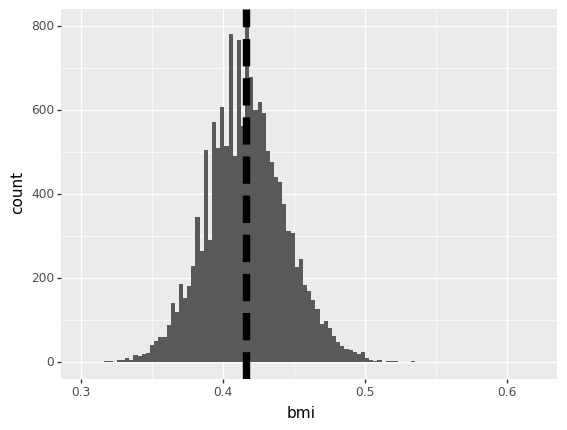

<ggplot: (8791309135633)>

In [38]:
#8
fifa["bmi"] = fifa['weight_kg']/fifa['height_cm']
mean = fifa["bmi"].mean()
(ggplot(fifa, aes ( x = "bmi")) +
geom_histogram() + 
geom_vline(xintercept = mean, linetype = "dashed", size = 3))


9. What is the relationship between height and weight for each `body_type`? Use `facet_wrap()` to make a separate height/weight scatterplot for each body type.

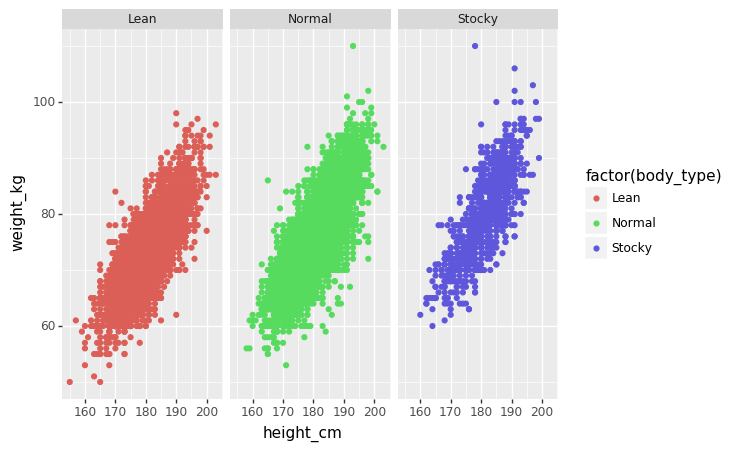

<ggplot: (8791309043693)>

In [39]:
(ggplot(fifa, aes ( x = "height_cm", y = "weight_kg", color = 'factor(body_type)')) +
geom_point() +
facet_wrap("~body_type")) 

10. Is there an association between jersey number and age?  Use ggplot/plotnine to make a graph to answer this question.